<a href="https://colab.research.google.com/github/ppseguel/network_math/blob/master/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#update networkx
pip install --upgrade networkx

In [0]:
#import dataset
#follow this documentation, using Github, https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92

import pandas as pd

url = 'https://raw.githubusercontent.com/ppseguel/network_math/master/full_mathoverflow.csv'
df = pd.read_csv(url,sep=",", header = None, names=['src', 'tgt', 'time', 'a2q', 'c2q', 'c2a','attr'])

In [0]:
import networkx as nx
import pandas as pd
import io
from collections import Counter

df1 = df.drop(df[df['attr'] != 'a2q'].index)
df1['weight'] = df.groupby(['src','tgt'])['src'].transform('count')
df1 = df1.drop(columns=['time'])
df1 = df1.drop_duplicates()

df2 = df.drop(df[df['attr'] != 'c2q'].index)
df2['weight'] = df.groupby(['src','tgt'])['src'].transform('count')
df2 = df2.drop(columns=['time'])
df2 = df2.drop_duplicates()

df3 = df.drop(df[df['attr'] != 'c2a'].index)
df3['weight'] = df.groupby(['src','tgt'])['src'].transform('count')
df3 = df3.drop(columns=['time'])
df3 = df3.drop_duplicates()

frames = [df1,df2,df3]
df0 = pd.concat(frames)
print(df0)

          src    tgt  a2q  c2q  c2a attr  weight
0           1      4    1    0    0  a2q       1
1           3      4    1    0    0  a2q       1
2           1      2    1    0    0  a2q      17
3          25      1    1    0    0  a2q       5
4          14     16    1    0    0  a2q       1
...       ...    ...  ...  ...  ...  ...     ...
506531  17581   1492    0    0    1  c2a       1
506533  20995  11100    0    0    1  c2a       5
506544  88576   4231    0    0    1  c2a       1
506548  20031   1114    0    0    1  c2a       1
506549  51428   1114    0    0    1  c2a       1

[272939 rows x 7 columns]


In [0]:
#Create graph from the edgelist
G =  nx.from_pandas_edgelist(df0,source='src',target='tgt',edge_attr=["weight",'attr'], create_using=nx.DiGraph())
print(nx.info(G))

print(nx.is_strongly_connected(G))
print(nx.is_weakly_connected(G))

print(nx.number_strongly_connected_components(G))

Largest = max(nx.strongly_connected_components(G), key=len)

#consider to replicate this process for the next 3 largest

print(Largest)

H = G.subgraph(Largest)

#Gc = nx.Graph.subgraph(Largest)
print(nx.info(H))


# 1. Compare largest component with the network. 2. Replicate for three largest. 3. Replicate process for each type of network. 4. Interpret differences.



Name: 
Type: DiGraph
Number of nodes: 24818
Number of edges: 239978
Average in degree:   9.6695
Average out degree:   9.6695
False
False
11626
{1, 2, 3, 4, 7, 32777, 32778, 11, 32783, 16, 32785, 19, 32788, 21, 22, 25, 27, 28, 30, 32, 32804, 37, 40, 32809, 42, 45, 32814, 49, 32818, 51, 50, 32817, 55, 32825, 32828, 32831, 65, 66, 71, 75, 78, 81, 32850, 83, 32851, 86, 88, 32858, 92, 93, 94, 96, 32864, 98, 32866, 100, 97, 102, 32871, 107, 109, 110, 111, 32882, 118, 121, 32898, 132, 135, 136, 32904, 32906, 140, 142, 143, 146, 32916, 151, 152, 32922, 158, 32928, 32938, 171, 173, 175, 32947, 180, 179, 182, 32951, 184, 32952, 32954, 32948, 32957, 32961, 32962, 200, 32968, 202, 32972, 65741, 32977, 32980, 215, 32985, 32988, 32990, 65764, 32999, 231, 33001, 238, 239, 33007, 250, 33018, 255, 65792, 259, 33028, 261, 262, 65800, 65801, 269, 271, 33039, 273, 274, 33042, 33046, 279, 33047, 65818, 284, 33052, 33054, 288, 290, 33058, 33062, 296, 297, 33064, 299, 300, 302, 303, 33071, 307, 65844, 310, 3

In [0]:
# Create 3 diffrent graphs based on the largest component
df_largest = nx.to_pandas_edgelist(H)
df_largest_a2q = df01 = df_largest.drop(df_largest[df_largest['attr'] != 'a2q'].index)
df_largest_c2q = df01 = df_largest.drop(df_largest[df_largest['attr'] != 'c2q'].index)
df_largest_c2a = df01 = df_largest.drop(df_largest[df_largest['attr'] != 'c2a'].index)

H_a2q = nx.from_pandas_edgelist(df_largest_a2q,source='source',target='target',edge_attr=["weight",'attr'], create_using=nx.DiGraph())
H_c2q = nx.from_pandas_edgelist(df_largest_c2q,source='source',target='target',edge_attr=["weight",'attr'], create_using=nx.DiGraph())
H_c2a = G =  nx.from_pandas_edgelist(df_largest_c2a,source='source',target='target',edge_attr=["weight",'attr'], create_using=nx.DiGraph())

print(nx.info(H_a2q))
print(nx.info(H_c2q))
print(nx.info(H_c2a))


Name: 
Type: DiGraph
Number of nodes: 12554
Number of edges: 55128
Average in degree:   4.3913
Average out degree:   4.3913
Name: 
Type: DiGraph
Number of nodes: 9405
Number of edges: 70669
Average in degree:   7.5140
Average out degree:   7.5140
Name: 
Type: DiGraph
Number of nodes: 12837
Number of edges: 79722
Average in degree:   6.2103
Average out degree:   6.2103


Density of largest component: 0.0011985996285092905


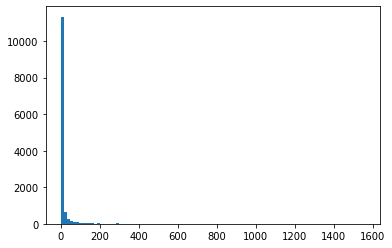

In [0]:
import numpy as np
import matplotlib.pyplot as plt
#Distribution analysis, structural, disconected, choose components, is it compact or not?
deg_in = np.asarray(sorted(H.in_degree()))
deg_out = np.asarray(sorted(H.out_degree()))
plt.hist(deg_out[:,1],bins=100)


#Distance measures, compact or not?
den= nx.density(H)
print("Density of largest component:", den)

#diam = nx.diameter(H)
#print("Diameter of largest component:", diam)




In [0]:
triadic_closure = nx.transitivity(G)
print("Triadic closure:", triadic_closure)

Triadic closure: 0.03882923218985866


In [0]:
#Create a dictionary of centralities, sorted node and print 20 nodes with highest degree
import networkx as nx
from operator import itemgetter

degree_dict_a2q = dict(H_a2q.degree(H_a2q.nodes()))
nx.set_node_attributes(H_a2q, degree_dict_a2q, 'degree')
sorted_degree_a2q = sorted(degree_dict_a2q.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by degree:")
for d in sorted_degree_a2q[:20]:
    print(d)

degree_dict_c2q = dict(H_c2q.degree(H_c2q.nodes()))
nx.set_node_attributes(H_c2q, degree_dict_c2q, 'degree')
sorted_degree_c2q = sorted(degree_dict_c2q.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by degree:")
for d in sorted_degree_c2q[:20]:
    print(d)

degree_dict_c2a = dict(H_c2a.degree(H_c2a.nodes()))
nx.set_node_attributes(H_c2a, degree_dict_c2a, 'degree')
sorted_degree_c2a = sorted(degree_dict_c2a.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by degree:")
for d in sorted_degree_c2a[:20]:
    print(d)

Top 20 nodes by degree:
(11142, 677)
(6094, 460)
(297, 411)
(290, 403)
(13650, 344)
(1459, 338)
(18060, 309)
(11260, 297)
(25510, 297)
(1946, 292)
(2384, 271)
(8799, 270)
(1587, 257)
(1409, 248)
(3106, 245)
(26935, 245)
(6101, 243)
(6794, 237)
(20302, 236)
(1441, 233)
Top 20 nodes by degree:
(290, 968)
(763, 872)
(1409, 662)
(121, 651)
(3684, 618)
(11142, 585)
(1465, 566)
(2841, 540)
(6094, 531)
(4177, 522)
(78, 489)
(4231, 466)
(18060, 458)
(8430, 441)
(297, 425)
(2926, 424)
(6101, 423)
(454, 399)
(1946, 394)
(9072, 389)
Top 20 nodes by degree:
(11142, 1078)
(290, 1071)
(297, 989)
(1946, 970)
(2926, 829)
(1409, 776)
(6094, 773)
(1149, 746)
(3684, 737)
(18060, 735)
(121, 676)
(763, 663)
(454, 612)
(2841, 593)
(6794, 569)
(6101, 519)
(4231, 510)
(2954, 506)
(2530, 502)
(613, 479)


In [0]:
from operator import itemgetter
#Out degree centrality a2q
out_degree_dict_a2q = nx.out_degree_centrality(H_a2q) # Run out_degree centrality
nx.set_node_attributes(H_a2q, out_degree_dict_a2q, 'out_degree')
sorted_out_degree_a2q = sorted(out_degree_dict_a2q.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by out degree centrality for a2q:")
for b in sorted_out_degree_a2q[:20]:
    print(b)
#mean and std
print("")
import statistics as stat
print(stat.mean(out_degree_dict_a2q[k] for k in out_degree_dict_a2q))

#Out degree centrality c2q
out_degree_dict_c2q = nx.out_degree_centrality(H_c2q) # Run out_degree centrality
nx.set_node_attributes(H_c2q, out_degree_dict_c2q, 'out_degree')
sorted_out_degree_c2q = sorted(out_degree_dict_c2q.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by out degree centrality for c2q:")
for b in sorted_out_degree_c2q[:20]:
    print(b)
print(stat.mean(out_degree_dict_c2q[k] for k in out_degree_dict_c2q))
#Out degree centrality c2a
out_degree_dict_c2a = nx.out_degree_centrality(H_c2a) # Run out_degree centrality
nx.set_node_attributes(H_c2a, out_degree_dict_c2a, 'out_degree')
sorted_out_degree_c2a = sorted(out_degree_dict_c2a.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by out degree centrality for c2a:")
for b in sorted_out_degree_c2a[:20]:
    print(b)
print(stat.mean(out_degree_dict_c2a[k] for k in out_degree_dict_c2a))

Top 20 nodes by out degree centrality for a2q:
(11142, 0.04596510794232455)
(297, 0.02812076794391779)
(13650, 0.027005496694017368)
(11260, 0.02350035848004461)
(18060, 0.022863060622958658)
(25510, 0.022703736158687166)
(6094, 0.020313869194614833)
(26935, 0.0193579224089859)
(1946, 0.018959611248307178)
(6794, 0.018879949016171436)
(2384, 0.01824265115908548)
(20302, 0.01768501553413527)
(8008, 0.01680873098064208)
(6101, 0.016569744284234845)
(7460, 0.015374810802198678)
(10076, 0.014896837409384212)
(454, 0.014896837409384212)
(1345, 0.014418864016569746)
(8799, 0.014259539552298256)
(121, 0.01378156615948379)

0.0003498183473936052
Top 20 nodes by out degree centrality for c2q:
(290, 0.09304551254785198)
(763, 0.08826031475967673)
(121, 0.0688005104210974)
(1409, 0.06412165036154828)
(3684, 0.06380263717566993)
(1465, 0.05752871118672905)
(11142, 0.05401956614206721)
(4177, 0.0449808592088473)
(18060, 0.04466184602296895)
(2926, 0.04402381965121225)
(4231, 0.0437048064653339)
(84

In [0]:
out_degree_dict_a2q = {key:val for key, val in out_degree_dict_a2q.items() if val > 0.0008}
out_degree_dict_c2a = {key:val for key, val in out_degree_dict_c2a.items() if val > 0.0008}
out_degree_dict_c2q = {key:val for key, val in out_degree_dict_c2q.items() if val > 0.0008}

In [0]:
from operator import itemgetter
#In degree centrality a2q
in_degree_dict_a2q = nx.in_degree_centrality(H_a2q) # Run out_degree centrality
nx.set_node_attributes(H_a2q, in_degree_dict_a2q, 'in_degree')
sorted_in_degree_a2q = sorted(in_degree_dict_a2q.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by in degree centrality for a2q:")
for b in sorted_in_degree_a2q[:20]:
    print(b)
from statistics import mean
print(mean(in_degree_dict_a2q[k] for k in in_degree_dict_a2q))
#In degree centrality c2q
in_degree_dict_c2q = nx.in_degree_centrality(H_c2q) # Run out_degree centrality
nx.set_node_attributes(H_c2q, in_degree_dict_c2q, 'in_degree')
sorted_in_degree_c2q = sorted(out_degree_dict_c2q.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by in degree centrality for c2q:")
for b in sorted_in_degree_c2q[:20]:
    print(b)
from statistics import mean
print(mean(in_degree_dict_c2q[k] for k in in_degree_dict_c2q))
#In degree centrality c2a
in_degree_dict_c2a = nx.in_degree_centrality(H_c2a) # Run out_degree centrality
nx.set_node_attributes(H_c2a, in_degree_dict_c2a, 'in_degree')
sorted_in_degree_c2a = sorted(in_degree_dict_c2a.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by in degree centrality for c2a:")
for b in sorted_in_degree_c2a[:20]:
    print(b)

Top 20 nodes by in degree centrality for a2q:
(1459, 0.021030829283836535)
(290, 0.01967657133752888)
(6094, 0.01633075758782761)
(1587, 0.01378156615948379)
(1532, 0.013622241695212301)
(4721, 0.012745957141719111)
(1, 0.012586632677447623)
(812, 0.012586632677447623)
(10446, 0.012347645981040389)
(2841, 0.010993388034732734)
(416, 0.0107544013383255)
(65, 0.010515414641918268)
(1409, 0.010435752409782523)
(1047, 0.010356090177646778)
(10909, 0.01019676571337529)
(3106, 0.01019676571337529)
(382, 0.009559467856289333)
(4362, 0.009400143392017845)
(1358, 0.0093204811598821)
(83, 0.009240818927746357)
0.0003498183473936052
Top 20 nodes by in degree centrality for c2q:
(290, 0.09304551254785198)
(763, 0.08826031475967673)
(121, 0.0688005104210974)
(1409, 0.06412165036154828)
(3684, 0.06380263717566993)
(1465, 0.05752871118672905)
(11142, 0.05401956614206721)
(4177, 0.0449808592088473)
(18060, 0.04466184602296895)
(2926, 0.04402381965121225)
(4231, 0.0437048064653339)
(8430, 0.04296044236

In [0]:
in_degree_dict_a2q = {key:val for key, val in in_degree_dict_a2q.items() if val > 0.0008}
in_degree_dict_c2a = {key:val for key, val in in_degree_dict_c2a.items() if val > 0.0008}
in_degree_dict_c2q = {key:val for key, val in in_degree_dict_c2q.items() if val > 0.0008}

In [0]:
from operator import itemgetter
#Eigenvector centrality for a2q
eigenvector_dict_a2q = nx.eigenvector_centrality_numpy(H_a2q.reverse(),weight='weight') # Run eigenvector centrality
nx.set_node_attributes(H_a2q.reverse(), eigenvector_dict_a2q, 'eigenvector')
sorted_eigenvector_a2q = sorted(eigenvector_dict_a2q.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by eigenvector for a2q:")
for b in sorted_eigenvector_a2q[:20]:
    print(b)

#Eigenvector centrality for c2q
eigenvector_dict_c2q = nx.eigenvector_centrality_numpy(H_c2q.reverse(),weight='weight') # Run eigenvector centrality
nx.set_node_attributes(H_c2q, eigenvector_dict_c2q, 'eigenvector')
sorted_eigenvector_c2q = sorted(eigenvector_dict_c2q.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by eigenvector for c2q:")
for b in sorted_eigenvector_c2q[:20]:
    print(b)

#Eigenvector centrality for c2a
eigenvector_dict_c2a = nx.eigenvector_centrality_numpy(H_c2a.reverse(),weight='weight') # Run eigenvector centrality
nx.set_node_attributes(H_c2a, eigenvector_dict_c2a, 'eigenvector')
sorted_eigenvector_c2a = sorted(eigenvector_dict_c2a.items(), key=itemgetter(1), reverse=False)

print("Top 20 nodes by eigenvector for c2a:")
for b in sorted_eigenvector_c2a[:20]:
    print(b)

Top 20 nodes by eigenvector for a2q:
(1450, 0.1487045235256157)
(2384, 0.13751764112277837)
(1098, 0.1362546333663905)
(297, 0.1293237665021946)
(19949, 0.11861457399539455)
(26935, 0.1126326616978577)
(11142, 0.1109863215293515)
(25510, 0.1087055377436952)
(4040, 0.10027628995656533)
(6153, 0.09778465478382285)
(454, 0.09445821269273243)
(1345, 0.09445260507967872)
(51, 0.09429194497728652)
(2807, 0.09421110555241345)
(13650, 0.0934313077864306)
(582, 0.09337532742053381)
(7460, 0.09315952989811702)
(5371, 0.09286766515600839)
(7311, 0.08990381785093263)
(3106, 0.08983560286171718)
Top 20 nodes by eigenvector for c2q:
(5259, 0.9398430107928457)
(13265, 0.10777218411981514)
(7460, 0.1009075810357569)
(297, 0.09504155894555477)
(2356, 0.08878356020536209)
(10076, 0.08789868598403115)
(1465, 0.07643624081480777)
(4428, 0.07333632767252132)
(36688, 0.0667697687763849)
(40297, 0.0594819261633618)
(83, 0.05096008380668332)
(353, 0.050039867404595026)
(3996, 0.04934291375530979)
(50846, 0.04

In [0]:
import math
#ratio eigenvector
#a2q/c2q
print("ratio eigenvector centrality a2q/c2q")
ratio_a2q_c2q_eigen ={x:(eigenvector_dict_a2q[x])/(eigenvector_dict_c2q[x]) for x in eigenvector_dict_c2q if x in eigenvector_dict_a2q}
sort = sorted(ratio_a2q_c2q_eigen.items(), key=itemgetter(1), reverse=True)
for b in sort[:20]:
    print(b)

#c2a/c2q
print("")
print("ratio eigenvector centrality c2a/c2q")
ratio_c2a_c2q_eigen ={x:(eigenvector_dict_c2a[x])/(eigenvector_dict_c2q[x]) for x in eigenvector_dict_c2q if x in eigenvector_dict_c2a}
sort = sorted(ratio_c2a_c2q_eigen.items(), key=itemgetter(1), reverse=True)
for b in sort[:20]:
    print(b)

ratio eigenvector centrality a2q/c2q
(7368, 4.9186550164016595e+17)
(200, 4.47865176659794e+17)
(22709, 4.331848829615619e+17)
(2788, 3.607551275847649e+17)
(32906, 3.336426166486955e+17)
(27287, 3.0028296573727654e+17)
(1557, 2.8674346541280448e+17)
(10469, 2.7265343979030963e+17)
(1220, 2.5930189445086595e+17)
(6345, 1.7874219932942938e+17)
(825, 1.6336056095261683e+17)
(5550, 1.628234383787586e+17)
(9248, 1.4339369392139189e+17)
(675, 1.0626665649430562e+17)
(4086, 1.0261934633026744e+17)
(4061, 9.659398934379157e+16)
(21900, 9.509290777977917e+16)
(57145, 9.308906819150238e+16)
(339, 8.664427657873154e+16)
(6822, 8.296186902712035e+16)

ratio eigenvector centrality c2a/c2q
(41345, 2.1354422672895773e+17)
(82691, 1.9418086242549773e+17)
(4086, 1.9288728719961984e+17)
(17332, 1.703786397119238e+17)
(200, 1.478687710304323e+17)
(76572, 9.619998299128427e+16)
(37385, 8.899634254187018e+16)
(5199, 6.050678265212408e+16)
(8996, 3.836885683018158e+16)
(17137, 2.428352042869226e+16)
(45570

In [0]:
#a2q_out/c2q_out
print("")
print("ratio out_degree centrality a2q/c2q out")
ratio_a2q_c2q_out ={x:(out_degree_dict_a2q[x]+0.005)/(out_degree_dict_c2q[x]+0.005)for x in out_degree_dict_c2q if x in out_degree_dict_a2q}
sort = sorted(ratio_a2q_c2q_out.items(), key=itemgetter(1), reverse=False)
for b in sort[:100]:
    print(b)

#a2q_out/c2a_out
print("")
print("ratio out_degree centrality a2q/c2a out")
ratio_a2q_c2a_out ={x:(out_degree_dict_a2q[x]+0.005)/(out_degree_dict_c2a[x]+0.005) for x in out_degree_dict_c2a if x in in_degree_dict_a2q}
sort = sorted(ratio_a2q_c2a_out.items(), key=itemgetter(1), reverse=False)
for b in sort[:100]:
    print(b)

#a2q_in/a2q_out
print("")
print("ratio out_degree centrality a2q in/a2q out")
ratio_a2q_in_a2q_out ={x:(in_degree_dict_a2q[x]+0.005)/(out_degree_dict_a2q[x]+0.005) for x in out_degree_dict_a2q if x in in_degree_dict_a2q}
sort = sorted(ratio_a2q_in_a2q_out.items(), key=itemgetter(1), reverse=False)
for b in sort[:100]:
    print(b)


ratio out_degree centrality a2q/c2q out
(763, 0.08521848344070604)
(290, 0.17774712743401266)
(14094, 0.1891821411913502)
(1465, 0.19080217662221532)
(1409, 0.20717794041341997)
(4177, 0.2084204223401319)
(2841, 0.23907517467986603)
(1353, 0.24123754034740802)
(1384, 0.24524727361474508)
(78, 0.2469897244477467)
(2530, 0.24918520899722704)
(121, 0.2544910062588766)
(9072, 0.25559917496075985)
(3684, 0.2579255370169802)
(12166, 0.26426245003239024)
(7206, 0.2725093615528156)
(3927, 0.2767738265337506)
(3272, 0.278729213517798)
(2926, 0.28723780732835374)
(13265, 0.2894127692613769)
(17308, 0.2903233275026763)
(35626, 0.2912630028534075)
(1463, 0.29265194176782544)
(4721, 0.2955192178744914)
(3948, 0.2976121228192349)
(8430, 0.3019114276296846)
(353, 0.30276389344931204)
(3206, 0.30577783272177994)
(12705, 0.3097754431894832)
(44953, 0.3114198575596806)
(613, 0.31151411102115456)
(2000, 0.3152317663354132)
(8385, 0.32205989811070335)
(21684, 0.3229380370241707)
(1847, 0.3278979049636373

In [0]:
print("ratio = 1 a2q_out/c2q_out ")
ratio_11={x: abs(((out_degree_dict_a2q[x]+0.005)/(out_degree_dict_c2q[x]+0.005))-1) for x in out_degree_dict_c2q if x in out_degree_dict_a2q}
sort = sorted(ratio_11.items(), key=itemgetter(1), reverse=False)
for b in sort[:10]:
    print(b)
print("")
print("ratio = 1 a2q_out/c2a_out ")
ratio_12={x: abs(((out_degree_dict_a2q[x]+0.005)/(out_degree_dict_c2a[x]+0.005))-1) for x in out_degree_dict_c2a if x in in_degree_dict_a2q}
sort = sorted(ratio_12.items(), key=itemgetter(1), reverse=False)
for b in sort[:10]:
    print(b)

print("")
print("ratio =1 a2q in/a2q out")
ratio_13 ={x:abs(((in_degree_dict_a2q[x]+0.005)/(out_degree_dict_a2q[x]+0.005))-1) for x in out_degree_dict_a2q if x in in_degree_dict_a2q}
sort = sorted(ratio_13.items(), key=itemgetter(1), reverse=False)
for b in sort[:10]:
    print(b)

In [0]:
keys = [26935,21907,32389,1098,51,2968,12205,4600,1059,6129]
print([out_degree_dict_c2q.get(key) for key in keys])
print([in_degree_dict_a2q.get(key) for key in keys])


[0.004891535516801361, 0.001169715014887282, 0.0005316886431305827, 0.0008507018290089324, 0.0013823904721395153, 0.00031901318587834965, 0.0005316886431305827, 0.0038281582305401958, 0.0002126754572522331, 0.0006380263717566993]
[0.0001593244642714889, 0.0015932446427148889, 0.0011949334820361666, 0.0001593244642714889, 0.004939058392416156, 7.966223213574445e-05, 0.0, 0.0013542579463076557, 0.0, 0.0015135824105791445]


In [0]:
'#Average Clustering coefficient for each graph
avg_c_complete = nx.average_clustering(H, weight="weight")
print("Average clutering coefficient for the complete graph:",avg_c_complete)

avg_c_a2q = nx.average_clustering(H_a2q, weight="weight")
print("Average clutering coefficient for the a2q graph:",avg_c_a2q)

avg_c_c2q = nx.average_clustering(H_c2q, weight="weight")
print("Average clutering coefficient for the c2q graph:",avg_c_c2q)

avg_c_c2a = nx.average_clustering(H_c2a, weight="weight")
print("Average clutering coefficient for the c2a graph:",avg_c_c2a)


Average clutering coefficient for the complete graph: 0.0002664782253414706
Average clutering coefficient for the a2q graph: 0.001518692438871029
Average clutering coefficient for the c2q graph: 0.0007424304269216724
Average clutering coefficient for the c2a graph: 0.00015392617183754406


In [0]:
#Clustering coefficient
#Global Network
c_complete = nx.clustering(H, weight="weight")
nx.set_node_attributes(H, c_complete, 'clust_coef')
sorted_c_complete = sorted(c_complete.items(), key=itemgetter(1), reverse=True)
print("Clustering coefficient for the global network")
for b in sorted_c_complete[:20]:
    print(b)
print("")
#a2q
c_a2q = nx.clustering(H_a2q, weight="weight")
nx.set_node_attributes(H_a2q, c_a2q, 'clust_coef')
sorted_c_a2q = sorted(c_a2q.items(), key=itemgetter(1), reverse=True)
print("Clustering coefficient for the a2q network")
for b in sorted_c_a2q[:20]:
    print(b)

print("")
#c2q
c_c2q = nx.clustering(H_c2q, weight="weight")
nx.set_node_attributes(H_c2q, c_c2q, 'clust_coef')
sorted_c_c2q = sorted(c_a2q.items(), key=itemgetter(1), reverse=True)
print("Clustering coefficient for the c2q network")
for b in sorted_c_c2q[:20]:
    print(b)

print("")
#c2a
c_c2a = nx.clustering(H_c2a, weight="weight")
nx.set_node_attributes(H_c2a, c_c2a, 'clust_coef')
sorted_c_c2a = sorted(c_c2a.items(), key=itemgetter(1), reverse=True)
print("Clustering coefficient for the a2q network")
for b in sorted_c_c2a[:20]:
    print(b)

Clustering coefficient for the global network
(57467, 0.004386646705101157)
(19880, 0.003438799540531583)
(25813, 0.003092847602179653)
(8145, 0.003027650141500226)
(11026, 0.0028987177411988535)
(48041, 0.0028572456147757724)
(42160, 0.002737697345819888)
(67097, 0.002724773393174813)
(20684, 0.0027177929351596334)
(16468, 0.002644896017670689)
(12800, 0.002562991248149717)
(35344, 0.002536228019424603)
(22972, 0.002533901211294357)
(23484, 0.0025191998149737805)
(66022, 0.002416280059801572)
(69236, 0.0024107011776482506)
(69488, 0.0023738096027868185)
(23324, 0.002372075689034583)
(49449, 0.002372075689034583)
(73508, 0.002363111398136257)

Clustering coefficient for the a2q network
(37439, 0.07692307692307694)
(1321, 0.07692307692307694)
(17008, 0.07692307692307694)
(27379, 0.07692307692307694)
(8812, 0.06576830564141144)
(50154, 0.06576830564141144)
(73388, 0.06105388661416153)
(30483, 0.055471137319515716)
(9433, 0.055471137319515716)
(13033, 0.055471137319515716)
(24812, 0.05547

In [0]:
clu_global = np.asarray()
plt.hist(clu_global[:,1],bins=100)

In [0]:
# top out degree centrality 
top_out_degree_a2q = sorted_out_degree_a2q[:20]

#Then find and print their degree
for tb in top_out_degree_a2q: # Loop through top_betweenness
    degree = degree_dict_a2q[tb[0]] # Use degree_dict to access a node's degree, see footnote 2
    print("Name:", tb[0], "| out_degree Centrality a2q:", tb[1], "| Degree:", degree)

# top out degree centrality 
top_out_degree_c2q = sorted_out_degree_c2q[:20]
#Then find and print their degree
for tb in top_out_degree_c2q: # Loop through top_betweenness
    degree = degree_dict_c2q[tb[0]] # Use degree_dict to access a node's degree, see footnote 2
    print("Name:", tb[0], "| out_degree Centrality c2q:", tb[1], "| Degree:", degree)

# top out degree centrality 
top_out_degree_c2a = sorted_out_degree_c2a[:20]
#Then find and print their degree
for tb in top_out_degree_c2a: # Loop through top_betweenness
    degree = degree_dict_c2a[tb[0]] # Use degree_dict to access a node's degree, see footnote 2
    print("Name:", tb[0], "| out_degree Centrality c2a:", tb[1], "| Degree:", degree)

Name: 11142 | out_degree Centrality a2q: 0.04596510794232455 | Degree: 677
Name: 297 | out_degree Centrality a2q: 0.02812076794391779 | Degree: 411
Name: 13650 | out_degree Centrality a2q: 0.027005496694017368 | Degree: 344
Name: 11260 | out_degree Centrality a2q: 0.02350035848004461 | Degree: 297
Name: 18060 | out_degree Centrality a2q: 0.022863060622958658 | Degree: 309
Name: 25510 | out_degree Centrality a2q: 0.022703736158687166 | Degree: 297
Name: 6094 | out_degree Centrality a2q: 0.020313869194614833 | Degree: 460
Name: 26935 | out_degree Centrality a2q: 0.0193579224089859 | Degree: 245
Name: 1946 | out_degree Centrality a2q: 0.018959611248307178 | Degree: 292
Name: 6794 | out_degree Centrality a2q: 0.018879949016171436 | Degree: 237
Name: 2384 | out_degree Centrality a2q: 0.01824265115908548 | Degree: 271
Name: 20302 | out_degree Centrality a2q: 0.01768501553413527 | Degree: 236
Name: 8008 | out_degree Centrality a2q: 0.01680873098064208 | Degree: 222
Name: 6101 | out_degree Cen

In [0]:
!pip install python-louvain

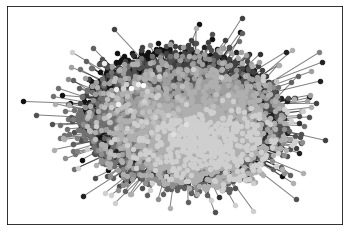

{1: 0, 4: 0, 3: 1, 2: 0, 25: 1, 16: 1, 22: 2, 27: 1, 28: 0, 21: 0, 7: 0, 32: 0, 1450: 1, 37: 0, 19: 1, 40: 0, 42: 0, 45: 1, 50: 1, 65: 0, 66: 0, 75: 3, 71: 0, 83: 0, 86: 3, 78: 3, 94: 1, 100: 0, 102: 1, 88: 0, 81: 0, 110: 4, 1004: 5, 297: 2, 121: 0, 97: 1, 450: 0, 184: 3, 132: 0, 158: 1, 151: 1, 200: 6, 30: 1, 136: 1, 231: 0, 238: 1, 1198: 1, 259: 0, 142: 1, 11: 0, 271: 0, 273: 1, 279: 7, 135: 1, 93: 1, 284: 3, 299: 0, 49: 3, 303: 3, 1464: 0, 290: 1, 1657: 0, 302: 1, 143: 1, 312: 1, 910: 1, 317: 3, 321: 0, 327: 4, 402: 8, 343: 1, 348: 1, 347: 3, 336: 3, 349: 0, 36108: 3, 353: 4, 344: 3, 360: 3, 361: 0, 370: 0, 986: 0, 367: 0, 351: 8, 375: 1, 371: 9, 381: 3, 382: 1, 13265: 0, 392: 0, 345: 0, 332: 0, 385: 1, 399: 3, 398: 4, 401: 8, 346: 2, 350: 1, 405: 1, 404: 0, 2467: 1, 412: 0, 182: 0, 416: 1, 310: 0, 340: 1, 424: 10, 422: 1, 250: 3, 431: 0, 362: 1, 434: 0, 239: 0, 2926: 3, 445: 1, 451: 0, 447: 3, 436: 1, 456: 1, 373: 0, 441: 1, 463: 3, 322: 0, 466: 0, 468: 1, 462: 1, 470: 3, 454: 1, 4

In [0]:
from community import community_louvain
G_non_direc =  nx.from_pandas_edgelist(df0,source='src',target='tgt',edge_attr=["weight",'attr'])
H_non_direc = G_non_direc.subgraph(Largest)
partition =community_louvain.best_partition(H_non_direc)
size = float(len(set(partition.values())))
pos = nx.spring_layout(H_non_direc)
count = 0
for com in set(partition.values()) :
    count = count + 1
    list_nodes = [nodes for nodes in partition.keys()if partition[nodes] == com]
    nx.draw_networkx_nodes(H_non_direc, pos, list_nodes, node_size = 20,node_color = str(count / size))
nx.draw_networkx_edges(H_non_direc, pos, alpha=0.5)
plt.show()
print(partition)

In [0]:
from community import community_louvain
G_non_direc =  nx.from_pandas_edgelist(df0,source='src',target='tgt',edge_attr=["weight",'attr'])
H_non_direc = G_non_direc.subgraph(Largest)
part = community_louvain.best_partition(H_non_direc)
values = [part.get(node) for node in H_non_direc.nodes()]
print(values)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 3, 0, 0, 0, 0, 1, 4, 5, 6, 7, 0, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 1, 0, 0, 4, 0, 8, 0, 0, 3, 1, 2, 3, 4, 0, 0, 0, 0, 0, 0, 3, 0, 9, 10, 0, 0, 0, 0, 0, 3, 5, 0, 3, 0, 1, 0, 0, 10, 0, 0, 2, 0, 1, 0, 1, 0, 5, 5, 5, 10, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 4, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 6, 0, 11, 4, 0, 10, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 1, 0, 1, 9, 0, 0, 5, 0, 0, 0, 0, 0, 0, 3, 0, 1, 12, 0, 0, 0, 5, 2, 0, 5, 3, 0, 0, 4, 0, 3, 0, 0, 0, 5, 4, 0, 0, 2, 0, 0, 0, 0, 4, 3, 0, 3, 0, 0, 0, 0, 1, 0, 0, 12, 0, 2, 3, 13, 5, 12, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 11, 5, 5, 0, 0, 3, 10, 0, 10, 1, 0, 3, 0, 0, 0, 12, 0, 9, 0, 0, 0, 0, 5, 0, 10, 0, 0, 0, 10, 5, 0, 5, 3, 5, 0, 3, 0, 0, 0, 0, 12, 0, 0, 0, 0, 9, 0, 0, 0, 11, 0, 0, 5, 0, 0, 9, 5, 11, 1, 0, 0, 13, 0, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 12, 0, 10, 1, 0, 14, 3, 0, 0, 5, 2, 0, 0, 0, 0, 2, 4, 5, 1, 0, 13, 0, 0, 0, 0, 0, 10, 0, 1, 0, 5, 0, 0, 1,

In [0]:
nx.set_node_attributes(H, part, 'modularity')
class0 = [x for x,y in H.nodes(data=True) if y['modularity']==0]
class1 = [x for x,y in H.nodes(data=True) if y['modularity']==1]
class2 = [x for x,y in H.nodes(data=True) if y['modularity']==2]
class3 = [x for x,y in H.nodes(data=True) if y['modularity']==3]
class4 = [x for x,y in H.nodes(data=True) if y['modularity']==4]
class5 = [x for x,y in H.nodes(data=True) if y['modularity']==5]
class6 = [x for x,y in H.nodes(data=True) if y['modularity']==6]
class7 = [x for x,y in H.nodes(data=True) if y['modularity']==7]
class8 = [x for x,y in H.nodes(data=True) if y['modularity']==8]
class9 = [x for x,y in H.nodes(data=True) if y['modularity']==9]
class10 = [x for x,y in H.nodes(data=True) if y['modularity']==10]
class11 = [x for x,y in H.nodes(data=True) if y['modularity']==11]
class12 = [x for x,y in H.nodes(data=True) if y['modularity']==12]
class13 = [x for x,y in H.nodes(data=True) if y['modularity']==13]
class14 = [x for x,y in H.nodes(data=True) if y['modularity']==14]
class15 = [x for x,y in H.nodes(data=True) if y['modularity']==15]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


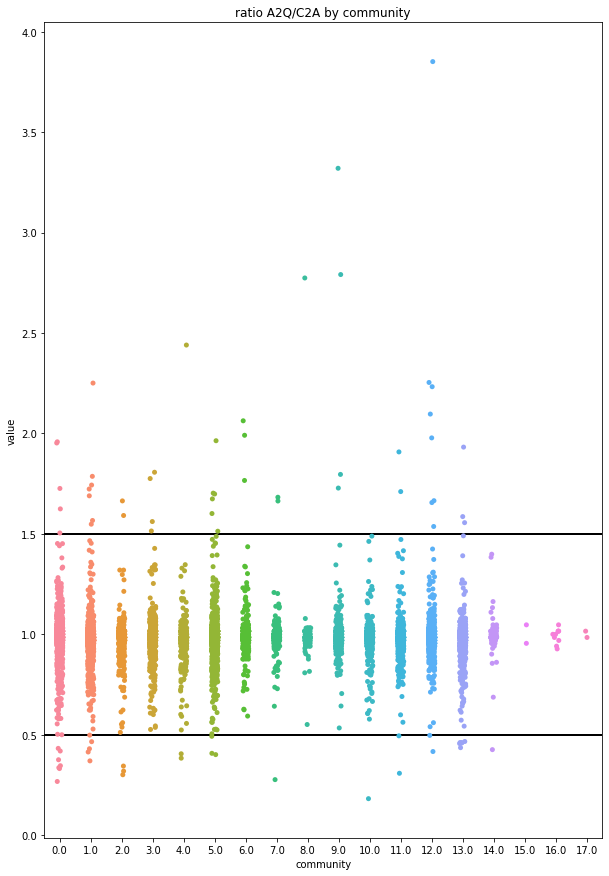

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
community =[]
ratio = []

for i in ratio_a2q_c2a_out.keys():
  ratio = np.append(ratio, ratio_a2q_c2a_out.get(i))
  comm = H.nodes[i]["modularity"]
  community = np.append(community,comm)

#plt.boxplot(community, ratio)
d = pd.DataFrame({"community":community, "ratio":ratio})

dd = pd.melt(d, id_vars=['community'], value_vars=['ratio'])
fig = plt.figure(figsize=(10,15))
plt.title("ratio A2Q/C2A by community")
fig.add_subplot(1,1,1)
plt.plot([-0.5, 18], [1.5, 1.5], 'k-', lw=2)
plt.plot([-0.5, 18], [0.5, 0.5], 'k-', lw=2)
ax1  = sns.stripplot(x="community",y='value',data=dd)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


[(0, 4)]

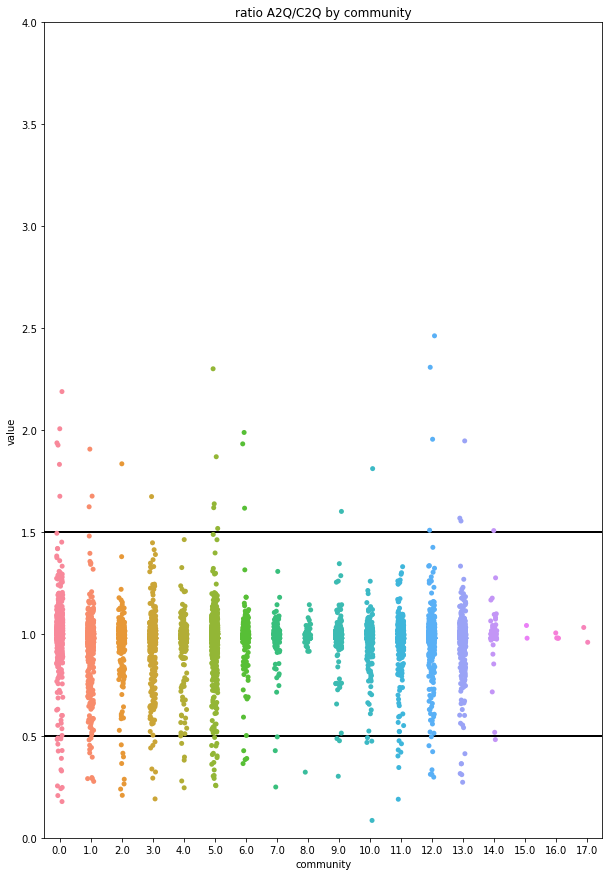

In [0]:
community2 =[]
ratio2 = []

for i in ratio_a2q_c2q_out.keys():
  ratio2 = np.append(ratio2, ratio_a2q_c2q_out.get(i))
  comm = H.nodes[i]["modularity"]
  community2 = np.append(community2,comm)

#plt.boxplot(community, ratio)
d2 = pd.DataFrame({"community":community2, "ratio":ratio2})
dd2 = pd.melt(d2, id_vars=['community'], value_vars=['ratio'])
fig = plt.figure(figsize=(10,15))
plt.title("ratio A2Q/C2Q by community")
plt.plot([-0.5, 18], [1.5, 1.5], 'k-', lw=2)
plt.plot([-0.5, 18], [0.5, 0.5], 'k-', lw=2)
fig.add_subplot(1,1,1)

ax2=sns.stripplot(x="community",y='value',data=dd2)
ax2.set(ylim=(0,4))

       community     ratio
0            0.0  2.235255
1            0.0  1.088872
2            0.0  1.278687
3            3.0  1.109778
4            0.0  1.427950
...          ...       ...
12549       11.0  0.984317
12550        5.0  0.984317
12551       16.0  0.984317
12552        5.0  0.984317
12553       11.0  0.984317

[12554 rows x 2 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


[(0, 4)]

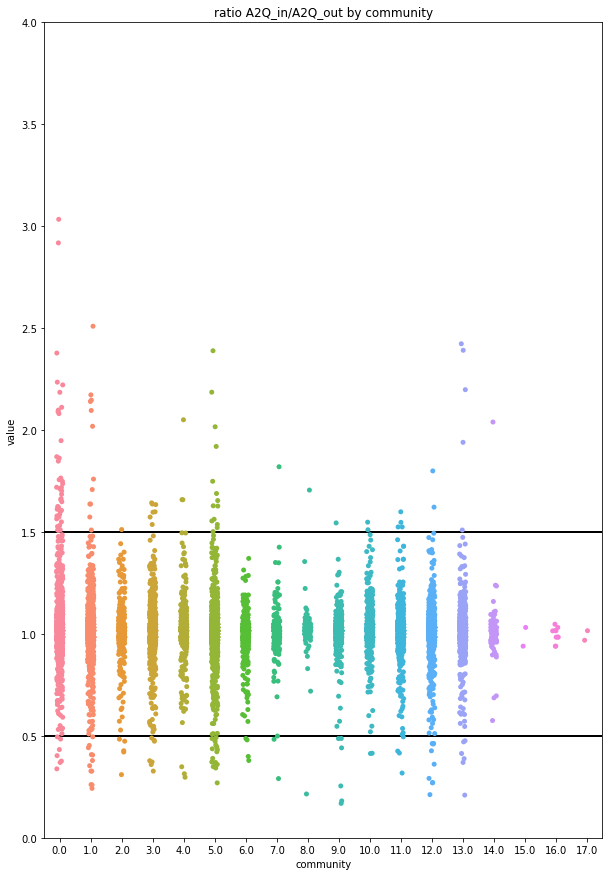

In [0]:
community3 =[]
ratio3 = []

for i in ratio_a2q_in_a2q_out.keys():
  ratio3 = np.append(ratio3, ratio_a2q_in_a2q_out.get(i))
  comm = H.nodes[i]["modularity"]
  community3 = np.append(community3,comm)

#plt.boxplot(community, ratio)
d3 = pd.DataFrame({"community":community3, "ratio":ratio3})
print(d3)
dd3 = pd.melt(d3, id_vars=['community'], value_vars=['ratio'])
fig = plt.figure(figsize=(10,15))
plt.title("ratio A2Q_in/A2Q_out by community")
fig.add_subplot(1,1,1)
plt.plot([-0.5, 18], [1.5, 1.5], 'k-', lw=2)
plt.plot([-0.5, 18], [0.5, 0.5], 'k-', lw=2)
ax3 = sns.stripplot(x="community",y='value',data=dd3)
ax3.set(ylim=(0,4))

In [0]:
edges = np.asarray(H.edges())
print(len(edges))

205519


In [0]:
for i in len(edeg):
  if edges()